In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
cn = ['user_id', 'item_id', 'rating', 'timestamp']
rvd = pd.read_csv('/content/Review.data', sep='\t', names=cn)

In [4]:
mtd = pd.read_csv('/content/Movie_Id_Titles_data.txt')
mtd.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
df = pd.merge(rvd, mtd, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [6]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

,rating
title,
Aiqing wansui (1994),5.0
Entertaining Angels: The Dorothy Day Story (1996),5.0
Santa with Muscles (1996),5.0
Prefontaine (1997),5.0
They Made Me a Criminal (1939),5.0


In [7]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

,rating
title,
Star Wars (1977),584
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


In [8]:
rd = pd.DataFrame(df.groupby('title')['rating'].mean())
rd.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [10]:
rd['no of rating'] = pd.DataFrame(df.groupby('title')['rating'].count())
rd.head()

,rating,no of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: >

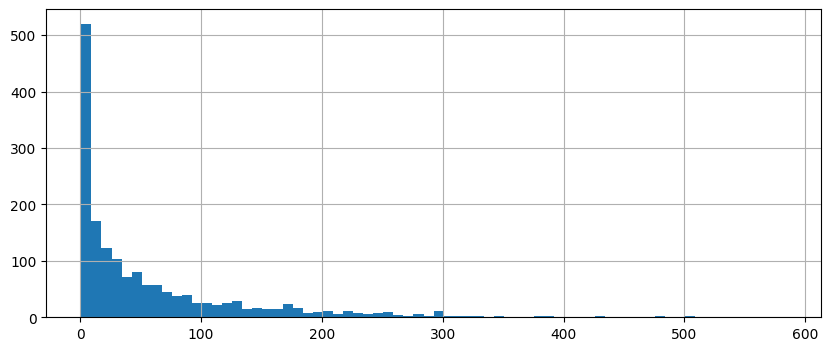

In [11]:
plt.figure(figsize=(10,4))
rd['no of rating'].hist(bins=70)

In [12]:
mm = df.pivot_table(index='user_id',columns='title',values='rating')
mm.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
starwars_user_ratings = mm['Star Wars (1977)']  #sci-fi movie
liarliar_user_ratings = mm['Liar Liar (1997)']  #comedy
starwars_user_ratings.head()

,Star Wars (1977)
user_id,
0,5.0
1,5.0
2,5.0
3,NaN
4,5.0


In [15]:
sim_starwars_user_ratings = mm.corrwith(starwars_user_ratings)
sim_liarliar_user_ratings = mm.corrwith(liarliar_user_ratings)

In [16]:
crs = pd.DataFrame(sim_starwars_user_ratings, columns=['Correlation'])
crs.dropna(inplace=True)
crs.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [17]:
crs.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Star Wars (1977),1.0
Stripes (1981),1.0
Hollow Reed (1996),1.0
Man of the Year (1995),1.0
Cosi (1996),1.0
Commandments (1997),1.0
No Escape (1994),1.0
"Scarlet Letter, The (1926)",1.0
Safe Passage (1994),1.0


In [18]:
crs = crs.join(rd['no of rating'])
crs.head()

,Correlation,no of rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [19]:
crs[crs['no of rating']>100].sort_values('Correlation',ascending=False).head()

,Correlation,no of rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [20]:
crs = pd.DataFrame(sim_liarliar_user_ratings, columns=['Correlation'])
crs.dropna(inplace=True)
crs = crs.join(rd['no of rating'])
crs[crs['no of rating']>100].sort_values('Correlation',ascending=False).head()

,Correlation,no of rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
